In [8]:
import pandas as pd
import numpy as np
import re
%pip install matplotlib
from matplotlib import pyplot as plt
import datetime as dt
from datetime import datetime
%pip install scipy
import scipy.stats as ss

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [42]:
def parse_date(date):
    return pd.to_datetime(date)
    # return datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

def parse_many_dates(dates):
    return map(parse_date, dates)
dog_rates = pd.read_csv("dog_rates_tweets.csv", parse_dates=[1])
# dog_rates['created_at'] = dog_rates['created_at'].apply(parse_date)
dog_rates['created_at']

0      2018-05-10 20:36:44
1      2018-05-09 23:54:02
2      2018-05-09 23:48:56
3      2018-05-09 22:02:03
4      2018-05-09 01:19:40
               ...        
8510   2018-08-10 18:12:18
8511   2018-08-10 17:56:00
8512   2018-08-10 17:30:12
8513   2018-08-10 17:19:32
8514   2018-08-10 17:01:01
Name: created_at, Length: 8515, dtype: datetime64[ns]

In [36]:

def extract_rating(tweet):
    """
    Args:
        tweet: a string that optionally contains a rating of the form x/10, where x is a positive integer

    Returns: NAN if the tweet has no rating, otherwise returns the numerical value of the rating
    """

    def process_rating(rating):
        num, _ = map(float, rating.split('/'))
        return num

    match = re.search(r'(\d+(\.\d+)?)/10', tweet)
    return np.nan if not match else process_rating(match.group())



In [37]:
def dates_and_ratings_of_tweets(tweets):
    """
    Args:
        tweets: a DataFrame where each row contains the date a tweet was sent, the user who made
        the tweet, and the content of the tweet

    Returns: a DataFrame where each row has a date and rating of a tweet which
    contains a rating of the form x/10, where x is in [0, 24]
    """
    def validate_ratings(rating):
        return np.nan if rating not in range(0, 26) else rating

    def remove_invalid_ratings(tweet_coll):
        tweets_cpy = tweet_coll.copy()
        tweets_cpy['rating'] = tweets_cpy['rating'].map(validate_ratings)
        return tweets_cpy.dropna()[['rating', 'created_at']]

    tweets_with_ratings = tweets.assign(rating=tweets['text'].apply(extract_rating))
    return remove_invalid_ratings(tweets_with_ratings)


In [38]:
tweets_with_valid_ratings = dates_and_ratings_of_tweets(dog_rates)

In [39]:
ratings = tweets_with_valid_ratings['rating'].values
dates = tweets_with_valid_ratings['created_at'].values
dates

array(['2018-05-09T23:48:56.000000000', '2018-05-08T16:23:07.000000000',
       '2018-05-07T23:11:58.000000000', ...,
       '2018-08-21T00:16:09.000000000', '2018-08-15T16:30:55.000000000',
       '2018-08-15T02:10:45.000000000'], dtype='datetime64[ns]')

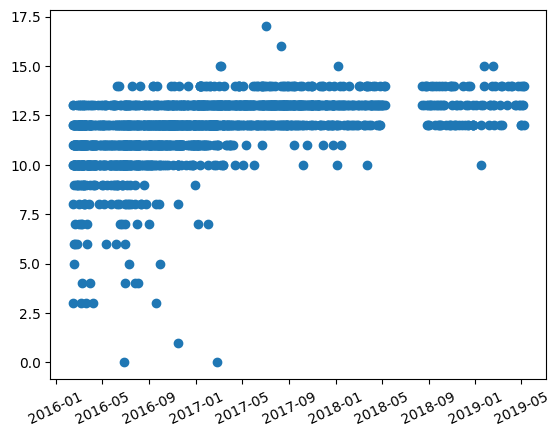

In [40]:
plt.xticks(rotation=25)
plt.plot(dates, ratings, 'o')

In [44]:
time_after_epoch = lambda date: (date.date() - datetime(1970, 1, 1)).dt.total_seconds()
list(map(time_after_epoch, dates))
# linear_reg = ss.linregress(map(time_after_epoch, dates), ratings)

AttributeError: 'numpy.datetime64' object has no attribute 'date'